In [2]:
import pandas as pd
data_path = 'Daily Household Transactions.csv'
df = pd.read_csv(data_path)
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df.head()
df = df[df['Income/Expense'] == 'Expense']
df = df.drop(columns=['Income/Expense', 'Currency'])
df = df.dropna(subset=['Mode', 'Category', 'Subcategory', 'Amount'])
df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_232\417400402.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Date,Mode,Category,Subcategory,Note,Amount
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0
5,2018-09-15 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0


In [6]:
print(df.columns)
df.columns = df.columns.str.strip()
print(df.columns)
df = df.dropna(subset=['Mode', 'Category', 'Subcategory', 'Amount'])
df.head()

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount'], dtype='object')
Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount'], dtype='object')


,Date,Mode,Category,Subcategory,Note,Amount
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0
5,2018-09-15 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = df[['Amount']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_scaled)

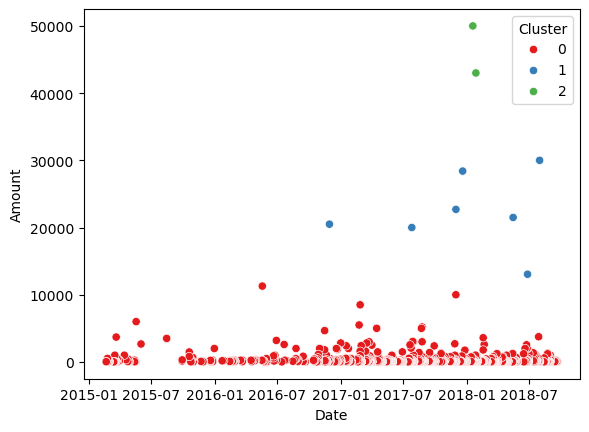

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df['Date'], y=df['Amount'], hue=df['Cluster'], palette='Set1')
plt.show()


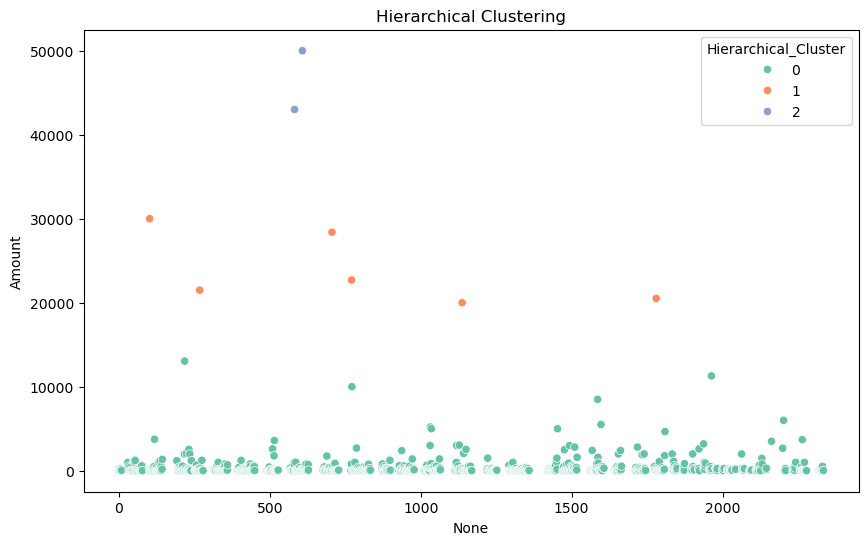

In [26]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(features_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Amount'], hue=df['Hierarchical_Cluster'], palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()